In [1]:
import numpy as np
import pandas as pd

In [2]:
#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Algorithms
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Path of the file to read
df= pd.read_csv("C:\\Users\\lenovo\\Downloads\\archive (3)\\Titanic-Dataset.csv")     

In [4]:
# EXPLORATION DATA ANALYSIS

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

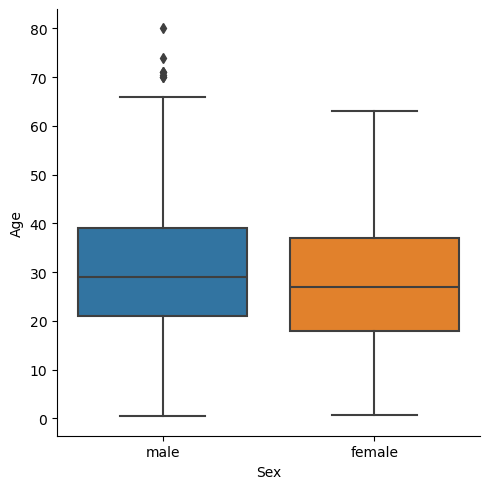

In [6]:
sns.catplot(x="Sex",y = "Age", kind ="box" , data=df)

<Axes: xlabel='Sex', ylabel='Survived'>

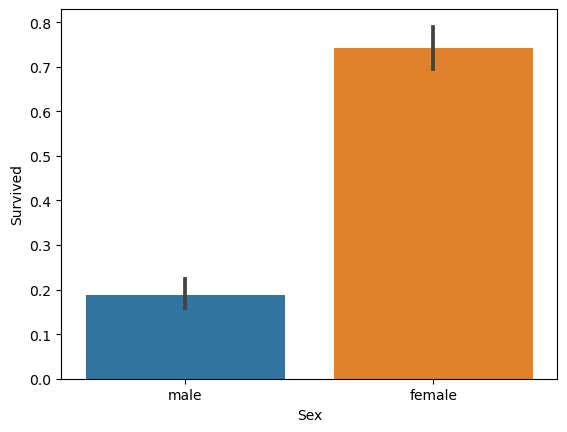

In [7]:
sns.barplot(x ='Sex', y = 'Survived', data = df)

<Axes: xlabel='Pclass', ylabel='Survived'>

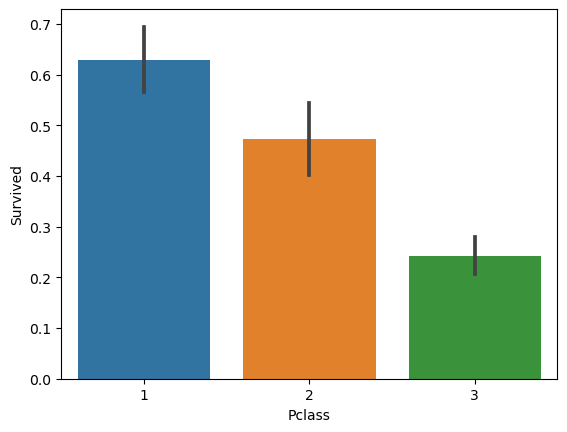

In [8]:
sns.barplot(x='Pclass', y='Survived', data=df)

<Axes: xlabel='Embarked', ylabel='Survived'>

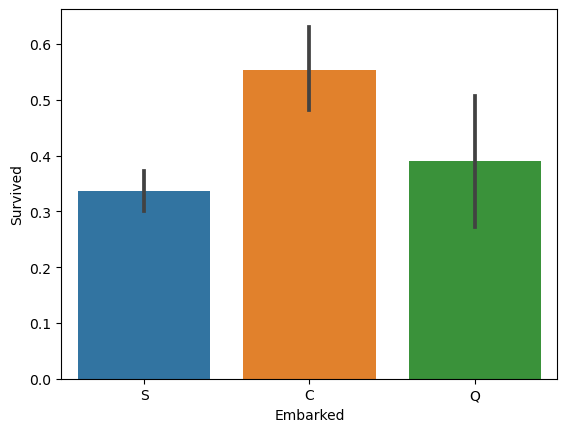

In [9]:
sns.barplot(x='Embarked', y='Survived', data=df)

In [10]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
New_df = df.drop(columns = ['Name','Sex','Ticket','Cabin','Cabin','Embarked'])
New_df.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
5,6,0,3,NaN,0,0,8.4583
6,7,0,1,54.0,0,0,51.8625
7,8,0,3,2.0,3,1,21.0750
8,9,1,3,27.0,0,2,11.1333
9,10,1,2,14.0,1,0,30.0708


<Axes: >

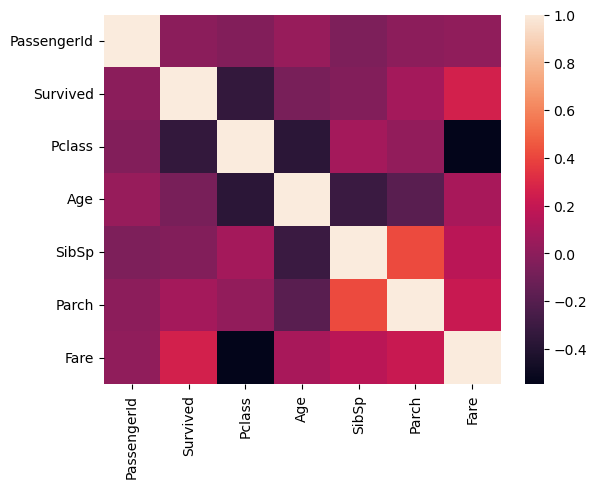

In [12]:
sns.heatmap(New_df.corr()) # hyphoteses

In [13]:
New_df.duplicated().sum()

0

In [14]:
Survived = df['Survived'].value_counts().reset_index()
Survived

,Survived,count
0,0,549
1,1,342


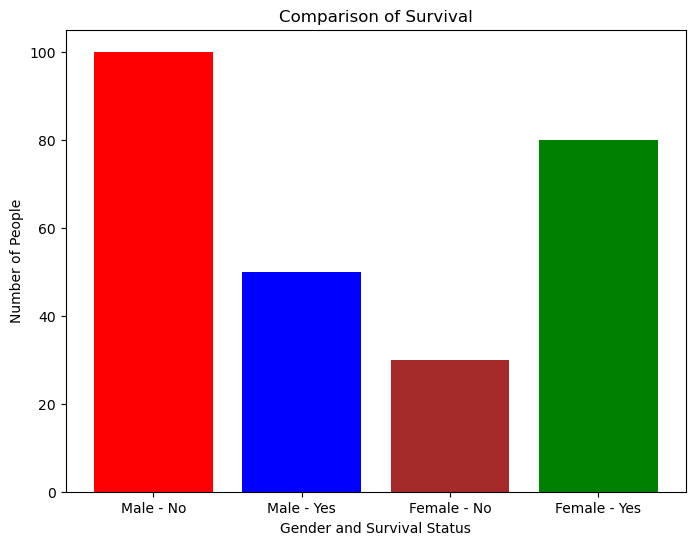

In [15]:
data = {'Survived': ['Male - No', 'Male - Yes', 'Female - No', 'Female - Yes'],
        'Counts': [100, 50, 30, 80]}  # replace with actual counts
Survived = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(Survived['Survived'], Survived['Counts'],color=["red","blue","brown","green"])
plt.xticks(Survived['Survived'])
plt.title('Comparison of Survival')
plt.xlabel('Gender and Survival Status')
plt.ylabel('Number of People')
plt.show()

In [16]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head(15)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
5,0,3,male,NaN,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708


In [17]:
inputs = df.drop('Survived',axis='columns')
target = df['Survived']
sex=pd.get_dummies(inputs.Sex)
sex.head(10)

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
5,False,True
6,False,True
7,False,True
8,True,False
9,True,False


In [18]:
inputs=pd.concat([inputs,sex],axis="columns")
inputs.head(10)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False
3,1,female,35.0,53.1000,True,False
4,3,male,35.0,8.0500,False,True
5,3,male,NaN,8.4583,False,True
6,1,male,54.0,51.8625,False,True
7,3,male,2.0,21.0750,False,True
8,3,female,27.0,11.1333,True,False
9,2,female,14.0,30.0708,True,False


In [19]:
inputs.drop(["Sex"],axis="columns",inplace=True)
inputs.head(10)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True
5,3,NaN,8.4583,False,True
6,1,54.0,51.8625,False,True
7,3,2.0,21.0750,False,True
8,3,27.0,11.1333,True,False
9,2,14.0,30.0708,True,False


In [20]:
inputs.isna().sum()

Pclass      0
Age       177
Fare        0
female      0
male        0
dtype: int64

In [21]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head(10)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,False,True
1,1,38.000000,71.2833,True,False
2,3,26.000000,7.9250,True,False
3,1,35.000000,53.1000,True,False
4,3,35.000000,8.0500,False,True
5,3,29.699118,8.4583,False,True
6,1,54.000000,51.8625,False,True
7,3,2.000000,21.0750,False,True
8,3,27.000000,11.1333,True,False
9,2,14.000000,30.0708,True,False


In [22]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   Fare    891 non-null    float64
 3   female  891 non-null    bool   
 4   male    891 non-null    bool   
dtypes: bool(2), float64(2), int64(1)
memory usage: 22.8 KB


In [23]:
inputs.isna().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64